In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make sure olsdiagnostics.py is in your working directory before importing
try:
	from olsdiagnostics import *   # first download the corresponding file from Canvas
except ModuleNotFoundError:
	print("olsdiagnostics.py not found. Please download it from Canvas and place it in your working directory.")

In [14]:
# %% Load data and create observation names
statex77 = pd.read_csv('statex77.csv')
statex77.index = np.array(statex77["Unnamed: 0"])
statex77 = statex77.drop(columns=["Unnamed: 0"])
print(statex77.head())

            Population  Income  Illiteracy  Life Exp  Murder  HS Grad  Frost  \
Alabama           3615    3624         2.1     69.05    15.1     41.3     20   
Alaska             365    6315         1.5     69.31    11.3     66.7    152   
Arizona           2212    4530         1.8     70.55     7.8     58.1     15   
Arkansas          2110    3378         1.9     70.66    10.1     39.9     65   
California       21198    5114         1.1     71.71    10.3     62.6     20   

              Area  
Alabama      50708  
Alaska      566432  
Arizona     113417  
Arkansas     51945  
California  156361  


Use a QQ plot to inspect whether Murder is normally distributed 
What is your conclusion and does this matter for a linear model explaining Murder?
TO DO: use sm.qqplot


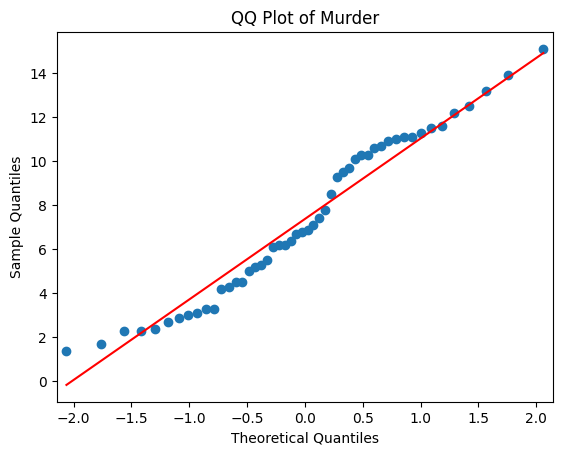

In [11]:
sm.qqplot(statex77['Murder'], line='s')
plt.title('QQ Plot of Murder')
plt.show()

In [13]:
#%% Create a linear model explaining Murder using Population, Income, Frost and Illiteracy
m = smf.ols(formula="Murder ~ Population + Income + Frost + Illiteracy", data=statex77)
result = m.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Murder   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     14.73
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           9.13e-08
Time:                        10:58:20   Log-Likelihood:                -114.82
No. Observations:                  50   AIC:                             239.6
Df Residuals:                      45   BIC:                             249.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2346      3.866      0.319      0.751      -6.552       9.021
Population     0.0002   9.05e-05      2.471      0.017    4.14e-05       0.000
Income      6.442e-05      0.001      0.094      0.925      -0.001       0.001
Frost          0.0006      0.010      0.058      0.954      -0.020       0.021
Illiteracy     4.1428      0.874      4.738      0.000       2.382       5.904
==============================================================================
Omnibus:                        3.209   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.175
Skew:                           0.430   Prob(JB):                        0.337
Kurtosis:                       3.553   Cond. No.                     7.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#%% Show the basic diagnostics
# What do you conclude?
influence = OLSInfluence(m)
TO DO: apply functions from olsdiagnostics to influence object

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
# --- Dummy data creatie voor demonstratie ---
# Normaal zou je hier je echte data 'X' en 'y' gebruiken om het model 'm' te fitten.
# Ik simuleer data die enigszins de patronen van je summary weerspiegelt.
np.random.seed(42)
n_obs = 50
population = np.random.normal(50000, 20000, n_obs)
income = np.random.normal(30000, 5000, n_obs)
frost = np.random.normal(100, 30, n_obs)
illiteracy = np.random.normal(2, 1, n_obs)
# Simuleer 'Murder' op basis van de coëfficiënten in je summary
# Voeg wat ruis toe en zorg voor een positieve scheefheid
true_murder = (1.2346 +
               0.0002 * population +
               6.442e-05 * income +
               0.0006 * frost +
               4.1428 * illiteracy)
# Voeg positief scheve ruis toe
murder = np.maximum(0.5, true_murder + np.random.lognormal(0, 0.4, n_obs) * 5) # Gebruik lognormale ruis voor scheefheid en om moorden positief te houden
X = pd.DataFrame({'Population': population, 'Income': income, 'Frost': frost, 'Illiteracy': illiteracy})
X = sm.add_constant(X)
y = pd.Series(murder, name='Murder')
m = sm.OLS(y, X).fit()
# --- Einde dummy data creatie ---

In [17]:
# Maak het OLSInfluence object
influence = OLSInfluence(m)
print("--- OLS Model Summary (ter referentie) ---")
print(m.summary())
print("\n" + "="*50 + "\n")

--- OLS Model Summary (ter referentie) ---
                            OLS Regression Results                            
Dep. Variable:                 Murder   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     47.36
Date:                Fri, 03 Oct 2025   Prob (F-statistic):           1.42e-15
Time:                        11:50:01   Log-Likelihood:                -126.90
No. Observations:                  50   AIC:                             263.8
Df Residuals:                      45   BIC:                             273.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

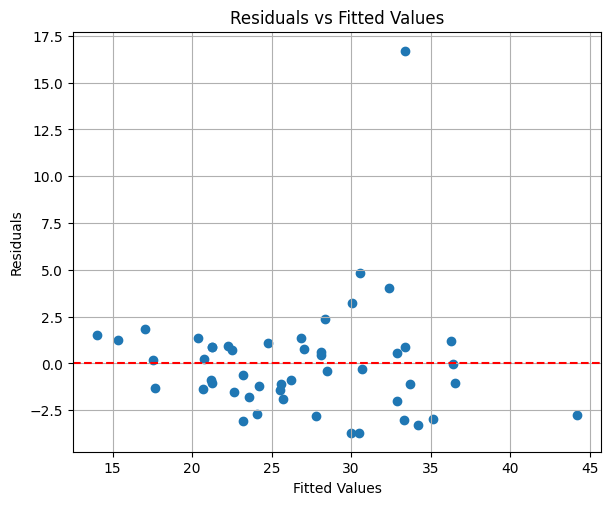

In [18]:
# --- Diagnostische Plots ---
plt.figure(figsize=(15, 12))
# 1. Residuals vs Fitted Values Plot (Lineaire aanname en homoscedasticiteit)
plt.subplot(2, 2, 1)
plt.scatter(m.fittedvalues, m.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)

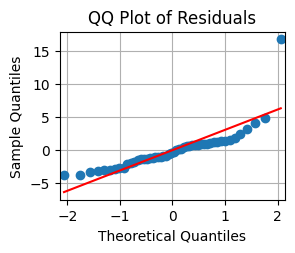

In [19]:
# 2. QQ Plot of Residuals (Normaliteit van de residualen)
plt.subplot(2, 2, 2)
sm.qqplot(m.resid, line='s', ax=plt.gca()) # ax=plt.gca() zorgt ervoor dat het in de subplot tekent
plt.title('QQ Plot of Residuals')
plt.grid(True)

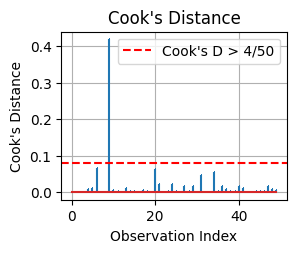

In [20]:
# 3. Leverage Plot / Influence Plot (Hoge leverage en invloedrijke punten)
# sm.graphics.influence_plot geeft een gecombineerde plot van leverage, studentized residuals en Cook's distance
# We kunnen ook Cook's distance afzonderlijk plotten voor de duidelijkheid.
plt.subplot(2, 2, 3)
plt.stem(np.arange(len(influence.cooks_distance[0])), influence.cooks_distance[0], markerfmt=",")
plt.axhline(4 / n_obs, color='red', linestyle='--', label=f'Cook\'s D > 4/{n_obs:.0f}')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.grid(True)

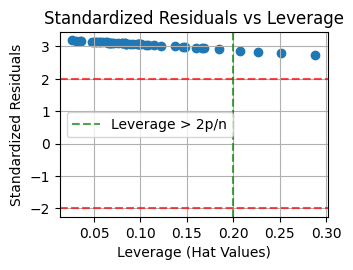

In [21]:

# 4. Standardized Residuals vs Leverage (alternatief voor influence_plot, of als aanvulling)
plt.subplot(2, 2, 4)
plt.scatter(influence.hat_matrix_diag, influence.resid_std)
plt.axhline(2, color='red', linestyle='--', alpha=0.7)
plt.axhline(-2, color='red', linestyle='--', alpha=0.7)
plt.axvline(2 * (X.shape[1] / n_obs), color='green', linestyle='--', alpha=0.7, label=f'Leverage > 2p/n')
plt.title('Standardized Residuals vs Leverage')
plt.xlabel('Leverage (Hat Values)')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()